In [1]:
import pandas as pd
import numpy as np 
%matplotlib inline

In [2]:
data_dir = '../data/clean_data/'

In [3]:
data = pd.read_csv(data_dir+'model_input.csv')
data.head()

,BENZI_IN_SOURCE_teo,BENZI_man,citation_teo,initial_teo,final_teo,citation_man,initial_man,final_man
0,三,三,33,s,ã∼,1,s,an
1,十,十,4,ts,ap,2,sh,i
2,夜,夜,55,m,e,4,y,e
3,我,我,53,NaN,ua,3,w,o
4,裌,裌,21,k,oiʔ,2,j,ia


### Explore the Sparsity in Data 

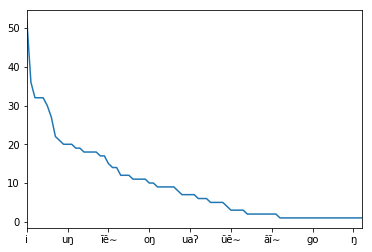

In [4]:
# the first 30 items has frequency greater than 10 
# the last 21 items has only appear once in the dataset
data['final_teo'].value_counts().plot()

### Regression Analysis

In [5]:
phoneme_tone = data[['citation_teo', 'initial_teo', 'final_teo', 'citation_man', 'initial_man', 'final_man']].copy() 
cols_to_transform = ['initial_teo', 'final_teo', 'initial_man', 'final_man'] 
phoneme_dummy = pd.get_dummies(phoneme_tone, columns=cols_to_transform, dummy_na=True)

In [6]:
phoneme_tone.head()

,citation_teo,initial_teo,final_teo,citation_man,initial_man,final_man
0,33,s,ã∼,1,s,an
1,4,ts,ap,2,sh,i
2,55,m,e,4,y,e
3,53,NaN,ua,3,w,o
4,21,k,oiʔ,2,j,ia


In [7]:
phoneme_dummy = phoneme_dummy.drop(columns = ['final_teo_nan'])

In [8]:
phoneme_dummy.final_man_nan

0      0
1      0
2      0
3      0
4      0
      ..
798    0
799    0
800    0
801    0
802    0
Name: final_man_nan, Length: 803, dtype: uint8

In [9]:
# train test split 
from sklearn.model_selection import train_test_split
dummy_train, dummy_test = train_test_split(phoneme_dummy, test_size=0.2, random_state=42)
train_origin, test_origin = train_test_split(phoneme_tone, test_size=0.2, random_state=42)

train_X = dummy_train[[col for col in dummy_train.columns if "_man" in col]].copy() 
train_Y = dummy_train[[col for col in dummy_train.columns if "_teo" in col]].copy() 
test_X = dummy_test[[col for col in dummy_test.columns if "_man" in col]].copy() 
test_Y = dummy_test[[col for col in dummy_test.columns if "_teo" in col]].copy() 

In [10]:
len(train_X), len(train_Y), len(test_X), len(test_Y.columns)

(642, 642, 161, 101)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier

In [12]:
forest = RandomForestClassifier(n_estimators=100)
classifier = MultiOutputClassifier(forest, n_jobs=-1)
classifier.fit(train_X, train_Y)
pred_Y = classifier.predict(test_X)

In [62]:
classifier.predict(test_X)[7]

array([33,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [45]:
pred_Y

array([[213,   0,   0, ...,   0,   0,   0],
       [213,   0,   0, ...,   0,   0,   0],
       [ 53,   0,   0, ...,   0,   0,   0],
       ...,
       [  4,   0,   0, ...,   0,   0,   0],
       [ 21,   0,   0, ...,   0,   0,   0],
       [ 55,   0,   0, ...,   0,   0,   0]])

In [14]:
test_Y

,citation_teo,initial_teo_b,initial_teo_h,initial_teo_k,initial_teo_kʰ,initial_teo_l,initial_teo_m,initial_teo_n,initial_teo_p,initial_teo_pʰ,...,final_teo_ŋ̍,final_teo_ũã∼,final_teo_ũĩ∼,final_teo_ũẽ∼,final_teo_ɯ,final_teo_ɯk,final_teo_ɯŋ,final_teo_ɯŋ̍,final_teo_ɿ,final_teo_ẽ∼
192,213,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
294,213,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
168,53,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
521,33,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
535,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,55,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
355,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
436,35,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
770,21,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Inspect the correct predictions 

In [15]:
CONSONANTS = {'m', 'n', 'ŋ', 'pʰ', 'tʰ', 'kʰ', 'p', 't', 'k', 'g', 
              'b', 'tsʰ', 'ts', 's', 'z', 'dz', 'l', 'h', 'h̃'}

def from_dummies(np_array, columns, categories, prefixes):
    new_df = []
    categories = [name.replace(prefixes[0],'').replace(prefixes[1],'')
                  for name in categories]
    categories = np.asarray(categories)
    for row in range(np_array.shape[0]):
        new_row = categories[np_array[row]!=0]
        new_dic = {}
        new_dic[columns[0]] = ''
        new_dic[columns[1]] = ''
        new_dic[columns[2]] = ''
        for idx in range(new_row.shape[0]):
            if idx == 0:
                new_dic[columns[0]] = np_array[row][0]
            elif new_row[idx][0] in CONSONANTS:
                new_dic[columns[1]] = new_row[idx][0]
            else:
                new_dic[columns[2]] = new_row[idx][0]
        new_df.append(pd.Series(new_dic))
    return pd.DataFrame(new_df) 

In [16]:
pred_Y_copy = pred_Y.copy()
pred_df = from_dummies(pred_Y_copy, ['citation_teo', 'initial_teo', 'final_teo'], 
                      test_Y.columns,
                      ['initial_teo_', 'final_teo_'])

In [17]:
pred_df = pred_df.rename(columns={'citation_teo': 'pred_citation_tone', 'initial_teo': 'pred_initial_teo', 
                         'final_teo': 'pred_final_teo'})

In [18]:
test_origin = test_origin.reset_index() 
test_origin.head(10)

,index,citation_teo,initial_teo,final_teo,citation_man,initial_man,final_man
0,192,213,kʰ,ou,4,k,u
1,294,213,tʰ,o,4,t,ui
2,168,53,NaN,ĩ∼,3,y,i
3,521,33,n,e,2,l,ing
4,535,33,ts,ĩã∼,4,zh,eng
5,789,55,l,aŋ,2,l,ang
6,591,55,NaN,iu,2,y,ou
7,323,33,k,oŋ,1,g,ong
8,218,213,s,au,4,s,ou
9,405,33,tʰ,ĩã∼,1,t,ing


In [19]:
combined = pd.concat([pred_df, test_origin], axis=1)
combined.head() 

,pred_citation_tone,pred_initial_teo,pred_final_teo,index,citation_teo,initial_teo,final_teo,citation_man,initial_man,final_man
0,213,k,,192,213,kʰ,ou,4,k,u
1,213,t,u,294,213,tʰ,o,4,t,ui
2,53,n,,168,53,NaN,ĩ∼,3,y,i
3,55,l,e,521,33,n,e,2,l,ing
4,213,,,535,33,ts,ĩã∼,4,zh,eng


### Accuracy for tones, initials, and finals 

In [29]:
tone_acc = combined[combined.pred_citation_tone==combined.citation_teo].shape[0]
initial_acc = combined[combined.pred_initial_teo==combined.initial_teo].shape[0]
final_acc = combined[combined.pred_final_teo==combined.final_teo].shape[0]

In [30]:
print(tone_acc/len(combined.index), initial_acc/len(combined.index), final_acc/len(combined.index))

0.5341614906832298 0.30434782608695654 0.031055900621118012


In [32]:
total_acc = combined[(combined.pred_citation_tone==combined.citation_teo)&
                    (combined.pred_initial_teo==combined.initial_teo)&
                    (combined.pred_final_teo==combined.final_teo)].shape[0]
print(total_acc/len(combined.index))

0.006211180124223602
